LOADING LIBRARIES AND DATA FOR DATAFRAME EXTRAXTION, TRNASFORMATION, LOADING

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [177]:
df = pd.read_csv("C:/Users/wajah/OneDrive/Desktop/projects/TeleCustomerChurn/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")


df_original = df.copy()

sns.set(style='whitegrid')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [179]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)
#df.info()
#df.head()

In [180]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [182]:
#def clean_dataframe(df):
    # 2. Check for missing values
   # print("Missing values before cleaning:\n", df.isnull().sum())
    
    # 3. Impute missing values
    # Example: filling numeric columns with mean
    #numeric_cols = df.select_dtypes(include=[np.number]).columns
    #for col in numeric_cols:
        #df[col] = df[col].fillna(df[col].mean())
        
    ## For categorical columns, fill with mode
    #categorical_cols = df.select_dtypes(include=['category']).columns
    #for col in categorical_cols:
      #  df[col] = df[col].fillna(df[col].mode()[0])
        
    # 4. Optionally drop any remaining rows with missing data
   # df = df.dropna()
    
    #print("Missing values after cleaning:\n", df.isnull().sum())
    #return df

# Clean the DataFrame
#df_cleaned = clean_dataframe(df)


In [183]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

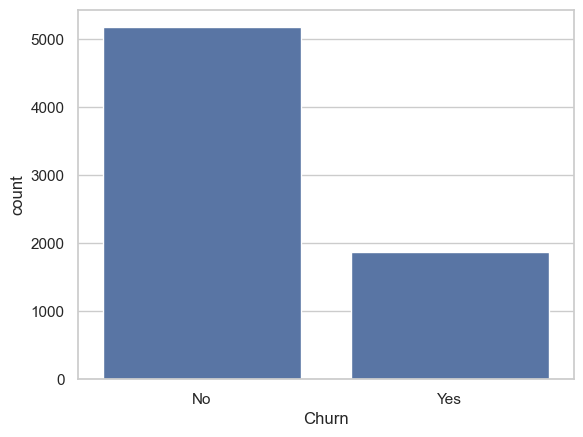

In [184]:
sns.countplot(x='Churn', data=df)

<Axes: xlabel='gender', ylabel='count'>

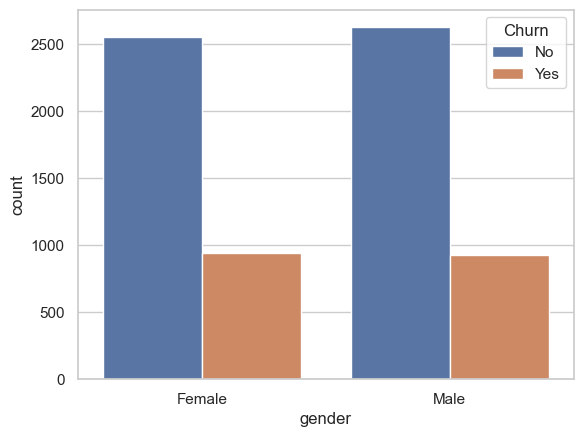

In [185]:
sns.countplot(x='gender', hue='Churn', data=df)

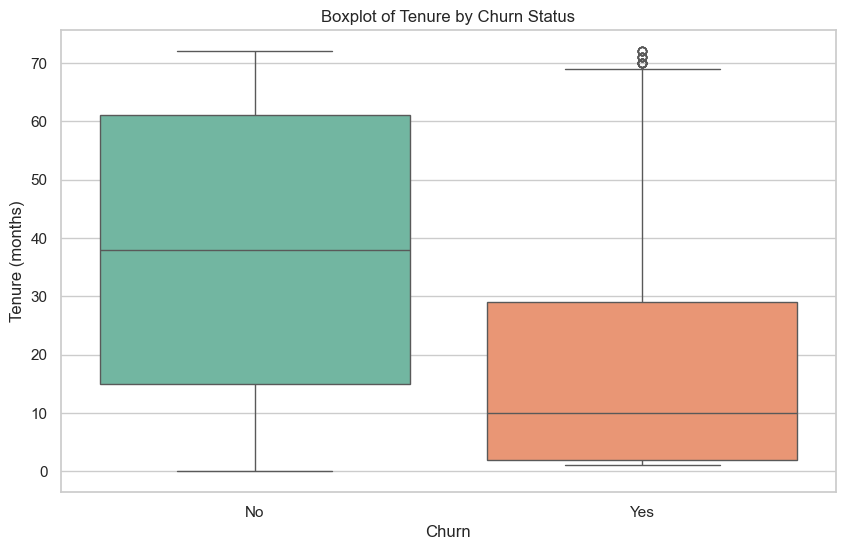

In [186]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', hue='Churn', data=df, palette='Set2', dodge=False)
plt.title("Boxplot of Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.legend([], [], frameon=False)
plt.show()


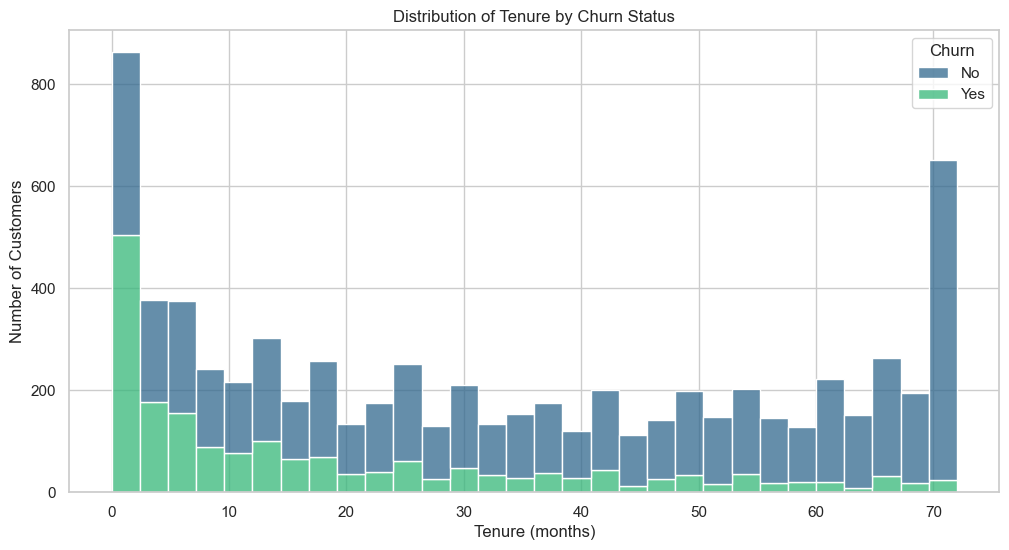

In [187]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='viridis')
plt.title("Distribution of Tenure by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


Data Preprocessing

In [188]:

le = LabelEncoder() #creating an instance of labelEncoder from scikit-learn library. Why? Label Encoder converts categorical values into numeric labels.
                    #which is useful for machine learning algorithms as ML models typically need numeric input. 

for column in df.columns:                         #Creating a loop that goes through each column in our dataframe df.
    if df[column].dtype == "object":              # for each column we check if its data type is "object". In pandas "object" typically means the column contains text data. 
        df[column] = le.fit_transform(df[column]) # if the column is in text data after the check in the previous thread then it does two things 
                                                  # 1- It uses le.fit_transform() to convert the text values into numbers. Each unique text value gets assigned a unique number.
                                                  # 2- We replace the original text data in the column with these new numbers. 
        
        print(f"Column :{column}, Unique Values : {df[column].unique()}") 
                                                   # So, after transformation here, we are printing out The name of the column 

Column :customerID, Unique Values : [5375 3962 2564 ... 3367 5934 2226]
Column :gender, Unique Values : [0 1]
Column :Partner, Unique Values : [1 0]
Column :Dependents, Unique Values : [0 1]
Column :PhoneService, Unique Values : [0 1]
Column :MultipleLines, Unique Values : [1 0 2]
Column :InternetService, Unique Values : [0 1 2]
Column :OnlineSecurity, Unique Values : [0 2 1]
Column :OnlineBackup, Unique Values : [2 0 1]
Column :DeviceProtection, Unique Values : [0 2 1]
Column :TechSupport, Unique Values : [0 2 1]
Column :StreamingTV, Unique Values : [0 2 1]
Column :StreamingMovies, Unique Values : [0 2 1]
Column :Contract, Unique Values : [0 1 2]
Column :PaperlessBilling, Unique Values : [1 0]
Column :PaymentMethod, Unique Values : [2 3 0 1]
Column :TotalCharges, Unique Values : [2505 1466  157 ... 2994 2660 5407]
Column :Churn, Unique Values : [0 1]


SEPERATING X AND Y DATA for training and testing purpose for the accurate machine learning process. 

In [189]:
X = df.drop("Churn", axis=1) 
                             #This line is creating a new dataframe called X 
                             #It is made by taking original dataframe df and removing the "Churn" column. 
                             #axis = 1 tell the function to drop a column (if it was axis=0, it would mean to drop a row)
                             # X now contains all the column from the df except for "Churn".
y = df["Churn"].values
                             #This line creates a new variable called y. 
                             #It takes "Churn" column from the original dataframe df. 
                              # .values converts this column into a numpy array. 

#THE PURPOSE OF THESE TWO LINES 
# X = df.drop("Churn", axis=1)
# Y = df["Churn"].values

#IS TO SEPERATE YOUR DATA INTO THE FOLLOWING:
# i) FEATURES (X) : All the columns that will be used to predict or explain the target. 
# ii) TARGET (y): The column you are tryin to predict or explain 

#This separation is a common step in preparing data for machine learning models. 
#The features (X) are used as inputs to predict the target (y).

TRAIN AND TEST SPLIT

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
# X is the feature which is the Churn and 
# y is the target that is the all the original data contained in the dataframe df excluding "Churn" column
# In other words The feature (X) are used as inputs to the machine learning model to predict the target (y), which is whether a customer will churn or not churn. 

SCALIGN - STANDARD SCALER


In [191]:
scaler = StandardScaler() # This line creates an instance of the StandardScaler class from the scikit learn.
                          # Standard scaler is used to standardized features by removing the mean and scaling to unit variance.

scaled_X_train = scaler.fit_transform(X_train) 
# This line does two things:
# step-1) .fit: it calculates the mean and standard deviation of each feature in X_train.
# step-2) .transform: It uses these calculation to standardize X_train. Which means that it turn the values to std either 1 or 0 for accurate resutls.
# and the result is stored in the variable: scaled_X_train

scaled_X_test = scaler.transform(X_test)
#This line only transforms X_test using the mean and standard deviation calculated from X_train. 
#We dont fit on X_train to data leakage. 

MACHINE LEARNING MODELS 

I m about use KNN (K - Nearest Neighbors) machine learning algorithm to predict the liklihood of customers churning. 

In [192]:
num_neighbours = [1, 3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27]

for n in num_neighbours:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, knn_pred)
    print("KNN accuracy:", round(accuracy_knn, 4))

KNN accuracy: 0.6403
KNN accuracy: 0.6616
KNN accuracy: 0.6758
KNN accuracy: 0.6895
KNN accuracy: 0.6872
KNN accuracy: 0.7033
KNN accuracy: 0.7099
KNN accuracy: 0.7137
KNN accuracy: 0.7156
KNN accuracy: 0.7194
KNN accuracy: 0.7227
KNN accuracy: 0.7227
KNN accuracy: 0.7208


In [193]:
best_knn = KNeighborsClassifier(n_neighbors = 25)
best_knn.fit(X_train, y_train)

best_knn_predict = best_knn.predict(X_test)
print(f"KNN Accuracy : {round(accuracy_score(y_test, best_knn_predict), 4)}")

KNN Accuracy : 0.7227


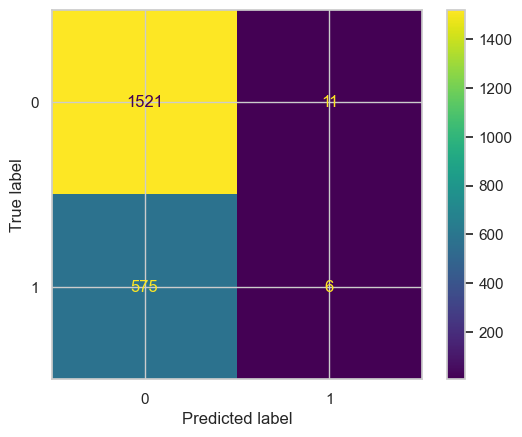

In [194]:
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)

SVC

In [215]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

print("SVC accuracy:", round(accuracy_score(y_test, svc_pred),4))

SVC accuracy: 0.725


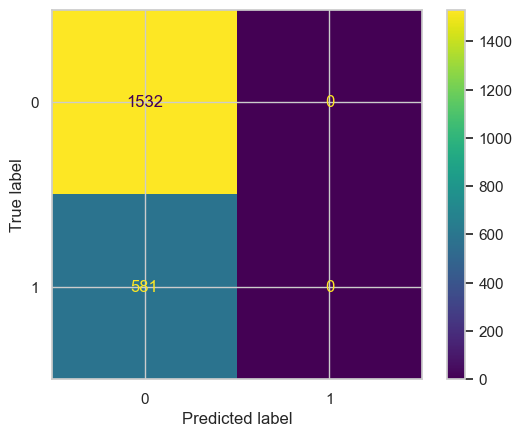

In [216]:
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test)

LOGISTIC REGESSION 

In [217]:
log_reg = LogisticRegression()
log_reg.fit(scaled_X_train, y_train)

log_pred = log_reg.predict(scaled_X_test)
print(f"Logistic Regression Accuracy : {round(accuracy_score(y_test, log_pred), 4)}")

Logistic Regression Accuracy : 0.7932


C:\Users\wajah\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


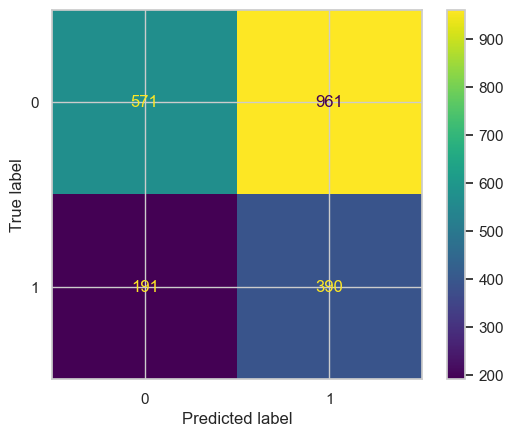

In [224]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)

In [223]:
ada_bst = AdaBoostClassifier(algorithm='SAMME')
ada_bst.fit(X_train,y_train)
ada_pred = ada_bst.predict(X_test)

print(f"AdaBoost Accuracy : {round(accuracy_score(y_test, ada_pred), 4)}")

AdaBoost Accuracy : 0.7932
